# STAT 207: The MM Algorithm

The MM algorithm:

- Original paper [Lange, K., Hunter, D. R., & Yang, I. (2000). Optimization transfer using surrogate objective functions. Journal of computational and graphical statistics, 9(1), 1-20.](https://www.tandfonline.com/doi/abs/10.1080/10618600.2000.10474858)

- relies on convexity arguments and is useful in high-dimensional problems such as image reconstruction.

- The first "M": majorize/minorize; the second "M": minimize/maximize depending on the problem.

- It substitutes a difficult optimization problem with a simpler one.

    - a) avoiding large matrix inversions, 
    
    - b) linearizing the problem, 
    
    - c) separating the variables, 
    
    - d) dealing with equality and inequality constraints, 
    
    - e) turning a nondifferentiable problem into a smooth problem.

- The price of simplifying the problem is iteration or iteration with slower convergence.

- The EM algorithm is a special case of the MM algorithm developed by statisticians that deals with missing data.

- Compared to other algorithms, the MM algorithm has 

    - greater generality,
    
    - more obvious connection to convexity, 
    
    - weaker reliance on difficult statistical principles.

## Definition

A function $g(x | x_n)$ is said to **majorize** a function $f(x)$ at $x_n$ provided
$$
f(x_n) = g(x_n | x_n),
$$
$$
f(x) \leq g(x | x_n) , \forall x \neq x_n.
$$

Here $x_n$ represents the current iterate in a search of the surface $f(x)$. 

![majorizing function](MM1.jpg)

In the **minimization** version of the MM algorithm, we minimize the surrogate majorizing function $g(x | x_n)$ rather than the actual function $f(x)$. 

- If $x_{n+1}$ denotes the minimum of the surrogate $g(x | x_n)$, then we can show that the MM procedure forces $f(x)$ downhill. 
$$
f(x_{n+1}) \le g(x_{n+1} | x_n) \le g(x_n | x_n) = f(x_n)
$$

- The descent property  lends the MM algorithm remarkable numerical stability. 

- It depends only on decreasing the surrogate function $g(x | x_n)$, not on minimizing it. 

- In practice, when the minimum of $g(x | x_n)$ cannot be found exactly. 

- When $f(x)$ is strictly convex, one can show with a few additional mild hypotheses that the iterates $x_n$ converge to the global minimum of $f(x)$ regardless of the initial point $x_0$.

- $x_n$ is a stationary point of $g(x | x_n) - f(x)$, with
$$
\nabla g(x_n | x_n) = \nabla f(x_n).
$$

- The second differential $d^2 g(x_n | x_n) - d^2 f(x_n)$ is PSD.

**Remarks**

- The MM algorithm and the EM algorithm can be viewed as a vague philosophy for deriving an algorithm

- Examples of the value of a unifying principle and a framework for attacking concrete problems

- The strong connection of the MM algorithm to convexity and inequalities can strengthen skills in these areas

## Majorizing Functions


<div>
<img src="MM_3d.jpg" alt="MM 3D" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{MM_3d.jpg}
\end{center}


Recall Jensen’s inequality 
$$
f\left(\sum_{i=1}^n \alpha_i t_i\right) \leq \sum_{i=1}^n \alpha_i f(t_i)
$$
for any convex function $f(t)$. Apply it to $f$ of a linear function $c^Tx$,
$$
f(c^Tx) \le \sum_{i} \frac{c_iy_i}{c^Ty} f\left( \frac{c^Ty}{y_i} x_i\right)
= g(x|y),
$$
provided all components of the vectors $c, x$ and $y$ are positive.

- It reduces optimization over $x$ to a sequence of one-dimensional optimizations over each component $x_i$.

- An alternative to relax the positivity restrictions:
$$
f(c^Tx) \le \sum_{i}\alpha_i f\left( \frac{c_i}{\alpha_i}(x_i - y_i) + c^Ty\right)
= g(x|y),
$$
with $\alpha_i \ge 0, \sum_i \alpha_i = 1$ and $\alpha_i>0$ whenever $c_i \ne 0$. For example,
$$
\alpha_i = \frac{|c_i|^p}{\sum_j |c_j|^p},
$$
for $p \ge 0$.

Linear majorization
$$
f(x) \le f(y) + df(y)(x − y) = g(x | y)
$$
for any concave function $f(x)$, for example, $\ln(x)$.

Assuming that $f(x)$ is twice differentiable, we look for a matrix $B$ satisfying $B \succeq d^2f(x)$ and $B \succ 0$. By second-order Taylor exapansion of $f(x)$ at $y$:
$$
\begin{aligned}
f(x) =& f(y) + df(y)(x - y) + \frac{1}{2} (x - y)^T d^2f(z)(x - y) \\
 \le& f(y) + df(y)(x - y) + \frac{1}{2} (x - y)^T B(x - y) \\     
=& g(x | y).
\end{aligned}
$$


### Example 12.4 Linear Regression

- How MM avoids matrix inversion


## MM Example: t-distribution

- A typical example of 12.5 Elliptically Symmetric Densities

Given iid data $\boldsymbol{w}_1, \ldots, \boldsymbol{w}_n$ from multivariate $t$-distribution $t_p(\boldsymbol{\mu}, \Sigma, \nu)$, the log-likelihood is
$$
\begin{aligned}
L(\boldsymbol{\mu}, \Sigma, \nu) &= -\frac{n p}{2} \log(\pi \nu) + n\left[\log \Gamma\left(\frac{\nu+p}{2}\right) - \log \Gamma\left(\frac{\nu}{2}\right)\right] - \frac{n}{2} \log\det(\Sigma) \\
&\quad + \frac{n}{2}(\nu+p) \log \nu - \frac{\nu+p}{2} \sum_{j=1}^n \log\left[\nu + (\boldsymbol{w}_j - \boldsymbol{\mu})^\top \Sigma^{-1} (\boldsymbol{w}_j - \boldsymbol{\mu})\right].
\end{aligned}
$$

- Since $t\rightarrow -\log t$ is a convex function, we can invoke the supporting hyperplane inequality to minorize the terms $-\log[\nu+\delta(w_j,\mu;\Sigma)]$:
$$
\begin{aligned}
-\log[\nu+\delta(w_j,\mu;\Sigma)]\geq& -\log[\nu^{(t)}+\delta(w_j,\mu^{(t)};\Sigma^{(t)})] - \frac{\nu+\delta(w_j,\mu;\Sigma)-\nu^{(t)}-\delta(w_j,\mu^{(t)};\Sigma^{(t)})}{\nu^{(t)}+\delta(w_j,\mu^{(t)};\Sigma^{(t)})} \\
 =& - \frac{\nu+\delta(w_j,\mu;\Sigma)}{\nu^{(t)}+\delta(w_j,\mu^{(t)};\Sigma^{(t)})} + c^{(t)},
\end{aligned}
$$

where $c^{(t)}$ is a constant irrelevant to the optimization.

- Minorization function:
$$
\begin{aligned}
g(\boldsymbol{\mu}, \Sigma, \nu) &= -\frac{n p}{2} \log(\pi \nu) + n\left[\log \Gamma\left(\frac{\nu+p}{2}\right) - \log \Gamma\left(\frac{\nu}{2}\right)\right] - \frac{n}{2} \log\det(\Sigma) \\
&\quad + \frac{n}{2}(\nu+p) \log \nu - \frac{\nu+p}{2} \sum_{j=1}^n \frac{\nu+\delta(w_j,\mu;\Sigma)}{\nu^{(t)}+\delta(w_j,\mu^{(t)};\Sigma^{(t)})} + c^{(t)}.
\end{aligned}
$$

**HW** NAS Problem 12.15 and 12.16.


## MM Example: non-negative matrix factorization (NNMF)


<div>
<img src="NNMF.jpg" alt="NNMF" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{NNMF.jpg}
\end{center}


- Nonnegative matrix factorization (NNMF) was introduced by [Lee and Seung (1999, 2001)](https://www.nature.com/articles/44565) as an analog of principal components and vector quantization with applications in data compression and clustering.

- In mathematical terms, one approximates a data matrix $X\in\mathbb{R}^{m\times n}$ with nonnegative entries $x_{ij}$ by a product of two low-rank matrices $V\in\mathbb{R}^{m\times r}$ and $W\in\mathbb{R}^{r\times n}$ with nonnegative entries $v_{ik}$ and $w_{kj}$.

- Consider minimization of the squared Frobenius norm
$$
L(V,W)=\|X-VW\|_F^2=\sum_i\sum_j(x_{ij}-\sum_kv_{ik}w_{kj})^2, \quad v_{ik}\geq 0, w_{kj}\geq 0,
$$
which should lead to a good factorization.

- $L(V,W)$ is not convex, but bi-convex. The strategy is to alternately update $V$ and $W$.

- The key is the majorization, via convexity of the function $(x_{ij}-x)^2$,
$$
(x_{ij}-\sum_{k}v_{ik}w_{kj})^2\leq \sum_{k} \frac{a^{(t)}_{ikj}}{b^{(t)}_{ij}} (x_{ij}-\frac{b^{(t)}_{ij}}{a^{(t)}_{ikj}} v_{ik}w_{kj})^2,
$$
where
$$
a^{(t)}_{ikj}=v^{(t)}_{ik}w^{(t)}_{kj},\quad b^{(t)}_{ij}=\sum_{k}v^{(t)}_{ik}w^{(t)}_{kj}.
$$

- This suggests the alternating multiplicative updates
$$
\begin{aligned}
v_{i,k}^{(t+1)} &\leftarrow v_{i,k}^{(t)}\frac{\sum_j x_{i,j}w_{k,j}^{(t)}}{\sum_j b_{i,j}^{(t)}w_{k,j}^{(t)}} \\
 b^{(t+1/2)}_{ij} &\leftarrow \sum_{k}v^{(t+1)}_{ik}w^{(t)}_{kj} \\
w_{k,j}^{(t+1)} &\leftarrow w_{k,j}^{(t)}\frac{\sum_i v_{i,k}^{(t+1)}x_{i,j}}{\sum_i v_{i,k}^{(t+1)}b_{i,j}^{(t+1/2)}} \\
\end{aligned}
$$

- The update in matrix notation is extremely simple:
$$
\begin{aligned}
\mathbf{B}^{(t)} &= \mathbf{V}^{(t)}  \mathbf{W}^{(t)} \\
\mathbf{V}^{(t+1)} &= \mathbf{V}^{(t)}  \odot \left( \mathbf{X}{\mathbf{W}^{(t)}}^T \right) \oslash \left(\mathbf{B}^{(t)} {\mathbf{W}^{(t)}}^T \right) \\
\mathbf{B}(t+ \frac{1}{2}) &= \mathbf{V}^{(t+1)}  \mathbf{W}^{(t)} \\
\mathbf{W}^{(t+1)} &= \mathbf{W}^{(t)} \odot \left( \mathbf{X}^T \mathbf{V}^{(t+1)} \right)
\oslash \left( {\mathbf{B}^{(t+\frac{1}{2})}}^T \mathbf{V}(t)^T\right) 
\end{aligned}
$$

where $\odot$ denotes elementwise multiplication and $\oslash$ denotes elementwise division. If we start with $v_{ik}, w_{kj} > 0$, parameter iterates stay positive.

### Python Implementation

In [1]:
import numpy as np
from PIL import Image
from sklearn.decomposition import NMF
from skimage import data

In [2]:
img = data.astronaut()
img.shape

(512, 512, 3)

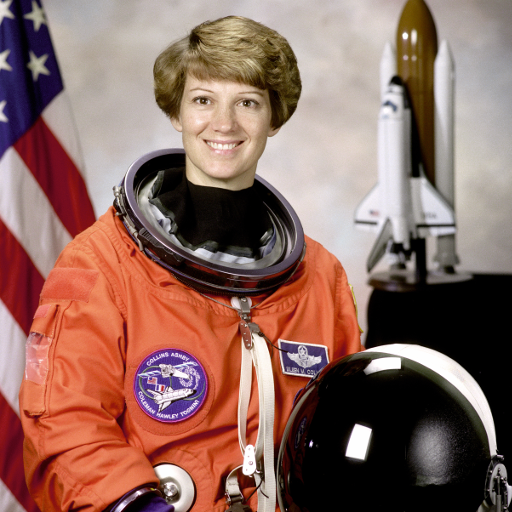

In [ ]:
img_show = Image.fromarray(img)
img_show

In [4]:
img = img_show.convert('L')
img_array = np.array(img)
img_array.shape

(512, 512)

In [5]:
# Perform non-negative matrix factorization
model = NMF(n_components=50, init='random', random_state=0)
W = model.fit_transform(img_array)
H = model.components_

/Users/feiz/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [6]:
print(W.shape)
print(H.shape)

(512, 50)
(50, 512)


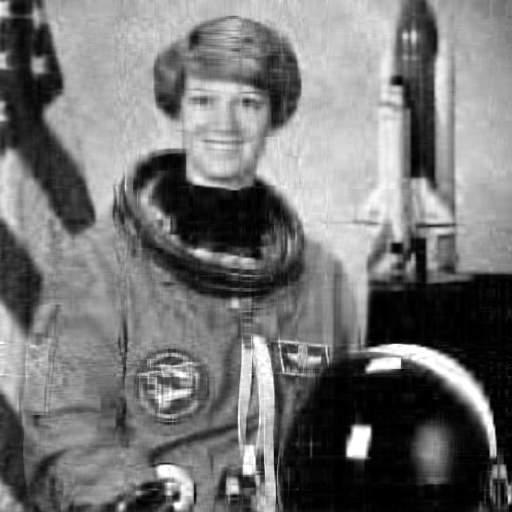

In [7]:
# Reconstruct image from compressed data
compressed_img = np.dot(W, H)
compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)

# Convert image back to PIL format and save
compressed_img = Image.fromarray(compressed_img.reshape(img.size))
compressed_img

In [8]:
compressed_img.save('compressed_astronaut.jpg')

## MM example: Netflix and matrix completion

Netflix database consists of about $m \approx 10^6$ users and about $n \approx 25,000$ movies. Users rate movies;
the ratings are recorded into matrix $A \in R^{m\times n}$. Only $1\%$ (over 100 million) of the ratings are observed.

<div>
<img src="Netflix.jpg" alt="Netflix" style="width: 500px;"/>
</div>

\begin{center}
\includegraphics[width=0.8\textwidth]{Netflix.jpg}
\end{center}

- Netflix challenge: impute the unobserved ratings for personalized recommendation. (http://en.wikipedia.org/wiki/Netflix_Prize)

- $\Omega = \{(i,j) : \text{observed entries}\}$ index the set of observed entries and $P_{\Omega}(\mathbf{M})$ denote the projection of matrix $\mathbf{M}$ to $\Omega$. The problem
$$
\min_{\text{rank}(\mathbf{X}) \leq r} \frac{1}{2} \left\| P_{\Omega}(\mathbf{Y}) - P_{\Omega}(\mathbf{X}) \right\|_{F}^{2} = \frac{1}{2} \sum_{(i,j) \in \Omega} (y_{ij} - x_{ij})^{2}
$$
is non-convex and hard.

-  Convex relaxation of the rank minimization problem is:
$$
\min_{\mathbf{X}} f(\mathbf{X}) = \frac{1}{2} \|\mathbf{P}_{\Omega}(\mathbf{Y}) - \mathbf{P}_{\Omega}(\mathbf{X})\|_F^2 + \lambda \|\mathbf{X}\|_*,
$$
where $\|\mathbf{X}\|_* = \|\sigma(\mathbf{X})\|_1 = \sum_i \sigma_i(\mathbf{X})$
is the nuclear norm.

- **Majorization step:**

$$
\begin{aligned}
f(\mathbf{X}) =& \frac{1}{2} \sum_{(i,j) \in \Omega} (y_{ij}-x_{ij})^2 + \frac{1}{2} \sum_{(i,j) \notin \Omega} 0 + \lambda \|\mathbf{X}\|_*  \\
\le& \frac{1}{2} \sum_{(i,j) \in \Omega} (y_{ij}-x_{ij})^2 + \frac{1}{2} \sum_{(i,j) \notin \Omega} (x^{(t)}_{ij}-x_{ij})^2 + \lambda \|\mathbf{X}\|_* \\
 =&  \frac{1}{2} \|\mathbf{X}-\mathbf{Z}^{(t)}\|_F^2 + \lambda \|\mathbf{X}\|_* \\
 =& g(\mathbf{X}|\mathbf{X}^{(t)}),
\end{aligned}
$$
where $\mathbf{Z}^{(t)} = \mathbf{P}_\Omega(\mathbf{Y}) + \mathbf{P}_{\Omega^\perp}(\mathbf{X}^{(t)})$. (Fill in missing entries by the current imputation)

- **Minimization step:** Rewrite the surrogate function
$$
g(\mathbf{X}|\mathbf{X}^{(t)}) = \frac{1}{2} \|\mathbf{X}\|_F^2 - \text{tr}(\mathbf{X}^T\mathbf{Z}^{(t)}) + \frac{1}{2}\|\mathbf{Z}^{(t)}\|_F^2 + \lambda \|\mathbf{X}\|_*
$$

Let $\sigma_i$ be the (ordered) sigular values of $\mathbf{X}$ and $\omega_i$ be the (ordered) sigular values of $\mathbf{Z}^{(t)}$. Observe
$$
\|\mathbf{X}\|_F^2 = \sum_i \sigma_i^2 \\
\|\mathbf{Z}^{(t)}\|_F^2 = \sum_i \omega_i^2
$$
and by [von Neumann's inequality](https://en.wikipedia.org/wiki/Trace_inequality#Von_Neumann.27s_trace_inequality),

$$
\text{tr}(\mathbf{X}^T \mathbf{Z}^{(t)}) \leq \sum_i \sigma_i \omega_i
$$

with equality achieved if and only if the left and right singular vectors of the two matrices coincide. Therefore we should choose $\mathbf{X}$ with the same singular vectors as $\mathbf{Z}^{(t)}$ and
$$
\begin{aligned}
g(\mathbf{X}|\mathbf{X}^{(t)}) =& \frac{1}{2}\sum_i \sigma_i^2 - \sum_i \sigma_i \omega_i + \frac{1}{2}\sum_i \omega_i^2 + \lambda \sum_i \sigma_i \\
=& \frac{1}{2}\sum_i (\sigma_i - \omega_i)^2 + \lambda \sum_i \sigma_i,
\end{aligned}
$$
with minimizer as 
$$
\sigma_i^{(t+1)} = \max(0, \omega_i - \lambda) = (\omega_i - \lambda)_+.
$$

- Algorithm for matrix completion:

    - Initialize  $\mathbf{X}^{(0)} \in\mathbb{R}^{m \times n}$

    - Repeat
        - $\mathbf{Z}^{(t)} \leftarrow \mathcal{P}_{\Omega}(\mathbf{Y}) + \mathcal{P}_{\Omega^{\perp}}(\mathbf{X}^{(t)})$

        - Compute SVD:  $\mathbf{U} \mathrm{diag}(\mathbf{w}) \mathbf{V}^{\top} \leftarrow \mathbf{Z}(t)$

        - $\mathbf{X}^{(t+1)} \leftarrow \mathbf{U} \mathrm{diag}[(\mathbf{w}-\lambda)_+] \mathbf{V}^{\top}$

    - objective value converges
